In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_ancillary
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [3]:
S0 = jsm_ancillary.load_sample("../../data/fiducial/S0_sample.h5")
S15 = jsm_ancillary.load_sample("../../data/fiducial/S15_sample.h5")
S30 = jsm_ancillary.load_sample("../../data/fiducial/S30_sample.h5")

In [4]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [6]:
MAHs_S0 = jsm_ancillary.make_matrix(S0, "MAH")
MAHs_S15 = jsm_ancillary.make_matrix(S15, "MAH")
MAHs_S30 = jsm_ancillary.make_matrix(S30, "MAH")

In [7]:
delta_mass = np.diff(MAHs_S0[:, ::-1])  # reverse to go forward in time
max_S0 = np.log10(np.nanmax(delta_mass, axis=1))

In [8]:
delta_mass = np.diff(MAHs_S15[:, ::-1])  # reverse to go forward in time
max_S15 = np.log10(np.nanmax(delta_mass, axis=1))

In [9]:
delta_mass = np.diff(MAHs_S30[:, ::-1])  # reverse to go forward in time
max_S30 = np.log10(np.nanmax(delta_mass, axis=1))

<Axes: ylabel='Mstar_ICL'>

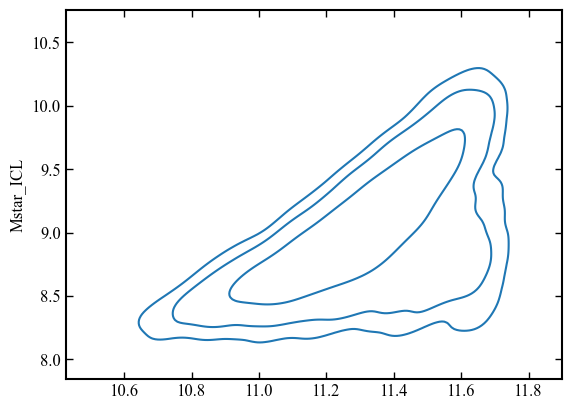

In [10]:
sns.kdeplot(x=max_S0, y=np.log10(S0.Mstar_ICL), levels=levelz)
# sns.kdeplot(x=max_S15, y=np.log10(S15.Mstar_ICL/S15.target_stellarmass), levels=levelz)
# sns.kdeplot(x=max_S30, y=np.log10(S30.Mstar_ICL/S30.target_stellarmass), levels=levelz)

In [11]:
np.mean(max_S0)

11.303261032538018

In [12]:
np.mean(max_S15)

11.30441747220508

In [13]:
np.mean(max_S30)

11.307929067324634

FIGURE 4

In [14]:
vmin = 0.001
vmax = 0.62

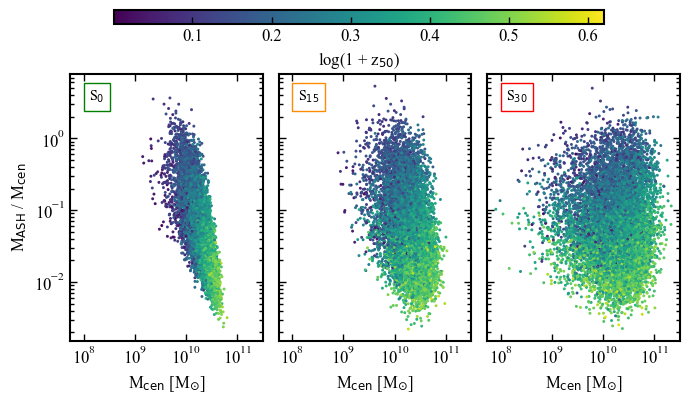

In [15]:
fig, axes = plt.subplots(1, 3,figsize=(double_textwidth,single_textwidth), sharex="row", sharey="row")

axes[0].scatter(S0.target_stellarmass, S0.Mstar_ICL/S0.target_stellarmass, marker=".", s=5, c=np.log10(1 + S0.host_z50), vmin=vmin, vmax=vmax)

axes[1].scatter(S15.target_stellarmass, S15.Mstar_ICL/S15.target_stellarmass, marker=".", s=5, c=np.log10(1 + S15.host_z50), vmin=vmin, vmax=vmax)

sc2 = axes[2].scatter(S30.target_stellarmass, S30.Mstar_ICL/S30.target_stellarmass, marker=".", s=5, c=np.log10(1 + S30.host_z50), vmin=vmin, vmax=vmax)

plt.subplots_adjust(top=0.9)
cbar_ax = fig.add_axes([0.17, 1.1, 0.7, 0.04])  # [left, bottom, width, height]
fig.colorbar(sc2, cax=cbar_ax, orientation="horizontal", label="log(1 + z$_{50}$)")

axes[0].text(0.1, 0.9, "S$_0$", transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axes[1].text(0.1, 0.9, "S$_{15}$", transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axes[2].text(0.1, 0.9, "S$_{30}$", transform=axes[2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

axes[2].set_xscale("log")
axes[2].set_yscale("log")

axes[0].set_ylabel("M$_{\\rm ASH}$ / M$_{\\rm cen}$")
axes[0].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[1].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[2].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[2].set_xticks([1e8, 1e9, 1e10, 1e11])
plt.tight_layout()

#plt.savefig("../../figures/Mcent_ICL.pdf", bbox_inches="tight")
plt.show()

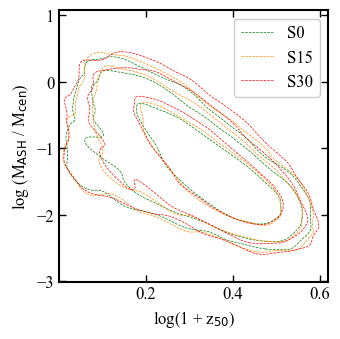

In [16]:
fig, ax = plt.subplots(figsize=(single_textwidth,single_textwidth))

sns.kdeplot(x=np.log10(1 + S0.host_z50), y=np.log10(S0.Mstar_ICL/S0.target_stellarmass), levels=levelz, color="green", linewidths=0.5, linestyles="--", label="S0")
sns.kdeplot(x=np.log10(1 + S15.host_z50), y=np.log10(S15.Mstar_ICL/S15.target_stellarmass), levels=levelz, color="darkorange", linewidths=0.5, linestyles="--", label="S15")
sns.kdeplot(x=np.log10(1 + S30.host_z50), y=np.log10(S30.Mstar_ICL/S30.target_stellarmass), levels=levelz, color="red", linewidths=0.5, linestyles="--", label="S30")

ax.plot([], [], color="green", linestyle="--", lw=0.5, label="S0")
ax.plot([], [], color="darkorange", linestyle="--", lw=0.5, label="S15")
ax.plot([], [], color="red", linestyle="--", lw=0.5, label="S30")
ax.legend(loc=1, framealpha=1)

ax.set_xlim(vmin, vmax)
ax.set_xlabel("log(1 + z$_{50}$)")
ax.set_ylabel("log (M$_{\\rm ASH}$ / M$_{\\rm cen}$)")

plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

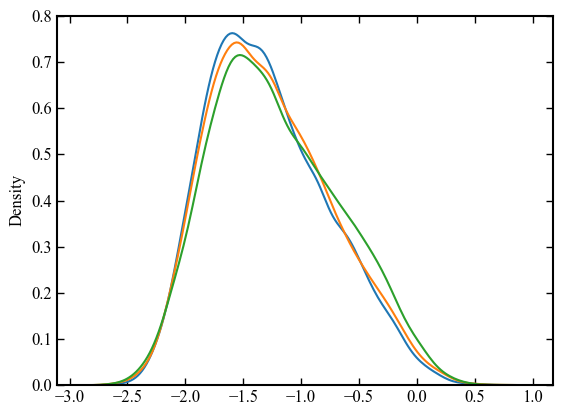

In [18]:
sns.kdeplot(np.log10(S0.Mstar_ICL/S0.target_stellarmass))
sns.kdeplot(np.log10(S15.Mstar_ICL/S15.target_stellarmass))
sns.kdeplot(np.log10(S30.Mstar_ICL/S30.target_stellarmass))


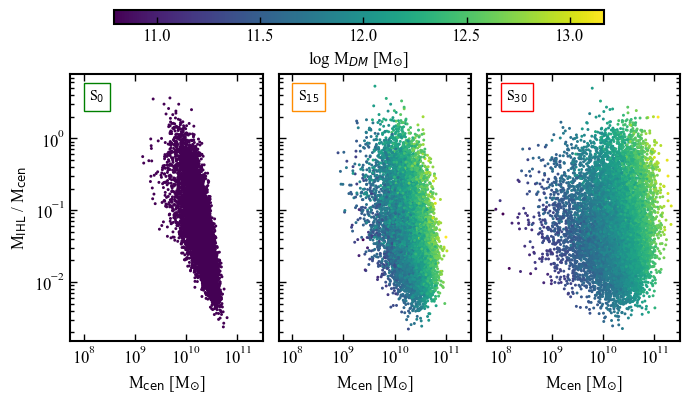

In [19]:
fig, axes = plt.subplots(1, 3,figsize=(double_textwidth,single_textwidth), sharex="row", sharey="row")

axes[0].scatter(S0.target_stellarmass, S0.Mstar_ICL/S0.target_stellarmass, marker=".", s=5, c=np.log10(S0.target_mass))

axes[1].scatter(S15.target_stellarmass, S15.Mstar_ICL/S15.target_stellarmass, marker=".", s=5, c=np.log10(S15.target_mass))

sc2 = axes[2].scatter(S30.target_stellarmass, S30.Mstar_ICL/S30.target_stellarmass, marker=".", s=5, c=np.log10(S30.target_mass))

plt.subplots_adjust(top=0.9)
cbar_ax = fig.add_axes([0.17, 1.1, 0.7, 0.04])  # [left, bottom, width, height]
fig.colorbar(sc2, cax=cbar_ax, orientation="horizontal", label="log M$_{DM}$ [M$_{\odot}$]")

axes[0].text(0.1, 0.9, "S$_0$", transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axes[1].text(0.1, 0.9, "S$_{15}$", transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axes[2].text(0.1, 0.9, "S$_{30}$", transform=axes[2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

axes[2].set_xscale("log")
axes[2].set_yscale("log")

axes[0].set_ylabel("M$_{\\rm IHL}$ / M$_{\\rm cen}$")
axes[0].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[1].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[2].set_xlabel("M$_{\\rm cen}$ [M$_{\odot}$]")
axes[2].set_xticks([1e8, 1e9, 1e10, 1e11])
plt.tight_layout()

# plt.savefig("../../figures/Mcent_ICL.pdf", bbox_inches="tight")
plt.show()

In [17]:
np.log10(S0.target_mass)

0       12.0
1       12.0
10      12.0
100     12.0
1000    12.0
        ... 
9995    12.0
9996    12.0
9997    12.0
9998    12.0
9999    12.0
Name: target_mass, Length: 10000, dtype: float64

In [18]:
# fig, axes = plt.subplots(1, 3,figsize=(double_textwidth,single_textwidth), sharex="row", sharey="row")

# axes[0].scatter(S0.target_stellarmass, S0.Mstar_ICL/S0.target_stellarmass, marker=".", c=np.log10(1 + S0.host_z50), vmin=vmin, vmax=vmax)

# axes[1].scatter(S15.target_stellarmass, S15.Mstar_ICL/S15.target_stellarmass, marker=".", c=np.log10(1 + S15.host_z50), vmin=vmin, vmax=vmax)

# sc2 = axes[2].scatter(S30.target_stellarmass, S30.Mstar_ICL/S30.target_stellarmass, marker=".", c=np.log10(1 + S30.host_z50), vmin=vmin, vmax=vmax)

# plt.subplots_adjust(top=0.9)
# cbar_ax = fig.add_axes([0.17, 1.1, 0.7, 0.04])  # [left, bottom, width, height]
# fig.colorbar(sc2, cax=cbar_ax, orientation="horizontal", label="log(1 + z$_{50}$)")

# axes[0].text(0.1, 0.9, "S$_0$", transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
# axes[1].text(0.1, 0.9, "S$_{15}$", transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
# axes[2].text(0.1, 0.9, "S$_{30}$", transform=axes[2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="red"))

# axes[2].set_xscale("log")
# axes[2].set_yscale("log")

# axes[0].set_ylabel("M$_{\\rm IHL}$ / M$_{\\rm central}$")
# axes[0].set_xlabel("M$_{\\rm central}$ [M$_{\odot}]$")
# axes[1].set_xlabel("M$_{\\rm central}$ [M$_{\odot}]$")
# axes[2].set_xlabel("M$_{\\rm central}$ [M$_{\odot}]$")
# axes[2].set_xticks([1e8, 1e9, 1e10, 1e11])

# plt.tight_layout()
# #plt.savefig("../../figures/Mcent_ICL.pdf", bbox_inches="tight")
# plt.show()

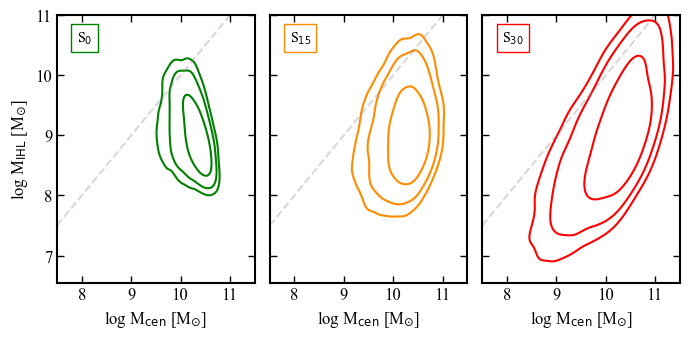

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(double_textwidth,single_textwidth), sharex=True, sharey=True)

sns.kdeplot(x=np.log10(S0.target_stellarmass), y=np.log10(S0.Mstar_ICL), ax=axes[0], color="green", levels=levelz, bw_adjust=1.5)
sns.kdeplot(x=np.log10(S15.target_stellarmass), y=np.log10(S15.Mstar_ICL), ax=axes[1], color="darkorange", levels=levelz, bw_adjust=1.5)
sns.kdeplot(x=np.log10(S30.target_stellarmass), y=np.log10(S30.Mstar_ICL), ax=axes[2], color="red", levels=levelz, bw_adjust=1.5)


axes[0].text(0.1, 0.9, "S$_0$", transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="green"))
axes[1].text(0.1, 0.9, "S$_{15}$", transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="darkorange"))
axes[2].text(0.1, 0.9, "S$_{30}$", transform=axes[2].transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="red"))


#axes[0].set_ylim(-3, 0)
axes[0].set_ylim(6.55, 11)


axes[0].set_ylabel("log M$_{\\rm IHL}$ [M$_{\odot}$]")
axes[0].set_xlabel("log M$_{\\rm cen}$ [M$_{\odot}$]")
axes[1].set_xlabel("log M$_{\\rm cen}$ [M$_{\odot}$]")
axes[2].set_xlabel("log M$_{\\rm cen}$ [M$_{\odot}$]")

axes[2].set_xticks([8, 9, 10, 11])

axes[0].axline((axes[0].get_ylim()[0], axes[0].get_ylim()[0]), slope=1, color="grey", alpha=0.3, ls="--")
axes[1].axline((axes[0].get_ylim()[0], axes[0].get_ylim()[0]), slope=1, color="grey", alpha=0.3, ls="--")
axes[2].axline((axes[0].get_ylim()[0], axes[0].get_ylim()[0]), slope=1, color="grey", alpha=0.3, ls="--")

axes[2].set_xlim([7.5,11.5])

plt.tight_layout()
plt.savefig("../../figures/Mcent_IHL.pdf", bbox_inches="tight")
plt.show()

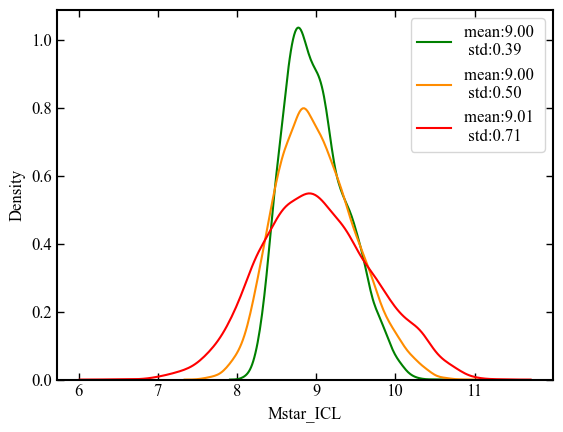

In [20]:
sns.kdeplot(np.log10(S0.Mstar_ICL), color="green", label=f"mean:{np.mean(np.log10(S0.Mstar_ICL)):.2f} \n std:{np.std(np.log10(S0.Mstar_ICL)):.2f}")
sns.kdeplot(np.log10(S15.Mstar_ICL), color="darkorange", label=f"mean:{np.mean(np.log10(S15.Mstar_ICL)):.2f} \n std:{np.std(np.log10(S15.Mstar_ICL)):.2f}")
sns.kdeplot(np.log10(S30.Mstar_ICL), color="red", label=f"mean:{np.mean(np.log10(S30.Mstar_ICL)):.2f} \n std:{np.std(np.log10(S30.Mstar_ICL)):.2f}")
plt.legend()
plt.show()

In [21]:
np.average(S30.Mstar_ICL/S30.target_stellarmass) * 100

14.205257853476441

In [22]:
10**8.91

812830516.1640995

<Axes: xlabel='Mstar_ICL', ylabel='Density'>

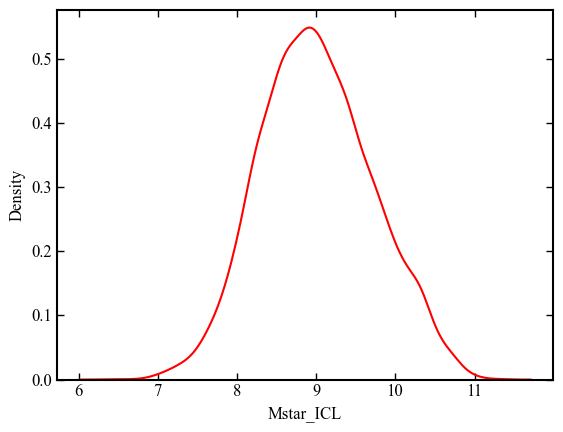

In [23]:
sns.kdeplot(np.log10(S30.Mstar_ICL), color="red", label=f"mean:{np.mean(np.log10(S30.Mstar_ICL))} \n std:{np.std(np.log10(S30.Mstar_ICL))}")


FIGURE 6

In [24]:
S0_a05 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha5.h5")
S0_a1 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha1.h5")
S0_a15 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha15.h5")
S0_a2 = jsm_stellarhalo.load_sample("../../data/fiducial/S0_sample.h5")
S0_a25 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha25.h5")
S0_a3 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha3.h5")
S0_a35 = jsm_stellarhalo.load_sample("../../data/SHMR/S0_alpha35.h5")

NameError: name 'jsm_stellarhalo' is not defined

In [ ]:
samples = [S0_a1, S0_a15, S0_a2, S0_a25, S0_a3, S0_a35]

In [ ]:
def analyze_sample(sample):

    #xvals = np.log10(sample["target_stellarmass"])
    try:
        yvals = np.log10(sample["Mstar_tot"] + sample["Mstar_acc"])
    except KeyError:
        yvals = np.log10(sample["Mstar_ICL"] + sample["Mstar_sat"] + sample["Mstar_acc"])

    #rcoeff = jsm_stats.correlation(xvals, yvals)

    return yvals
    #return xvals, yvals, rcoeff

In [ ]:
Mtot_dist = []

for sample in samples:
    Mtot_dist.append(analyze_sample(sample))

alphas = np.linspace(1, 3.5, 6)

In [ ]:
fig, axes = plt.subplots(figsize = (double_textwidth, single_textwidth))

violins_s0 = axes.violinplot(Mtot_dist, positions=alphas, widths=0.35, showmedians=True, showextrema=True)


for pc in violins_s0['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')

for partname in ('cmins', 'cmaxes', 'cbars'):
    vp = violins_s0[partname]
    vp.set_edgecolor("grey")
    vp.set_linewidth(1)
    vp = violins_s0['cmedians']
    vp.set_edgecolor("green")
    vp.set_linewidth(2.5)

axes.set_ylabel("log M$_{\\rm tot}$ [M$_{\odot}$]")
axes.set_xlabel("$\\alpha$")

axes.arrow(0.05, 0.1, 0.25, 0, width=0.02, color='orchid', alpha=0.5, transform=axes.transAxes)
axes.text(0.05, 0.15, "steeper SHMRs", color="orchid", transform=axes.transAxes)

plt.tight_layout()
plt.savefig("../../figures/SHMR_Mtot.pdf", bbox_inches="tight")

In [ ]:
Micl_dist = []
for sample in samples:
    Micl_dist.append(np.log10(sample["Mstar_ICL"].dropna()))

In [ ]:
len(Micl_dist)

In [ ]:
Micl_dist = []
for sample in samples:
    mstar = sample["Mstar_ICL"]
    valid = mstar[(mstar > 0) & np.isfinite(mstar)]  # Filter out non-positive and non-finite values
    Micl_dist.append(np.log10(valid))

fig, axes = plt.subplots(figsize = (double_textwidth, single_textwidth))

violins_s0 = axes.violinplot(Micl_dist, positions=alphas, widths=0.35, showmedians=True, showextrema=True)

for pc in violins_s0['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')

for partname in ('cmins', 'cmaxes', 'cbars'):
    vp = violins_s0[partname]
    vp.set_edgecolor("grey")
    vp.set_linewidth(1)
    vp = violins_s0['cmedians']
    vp.set_edgecolor("green")
    vp.set_linewidth(2.5)

axes.set_ylabel("log M$_{\\rm IHL}$ [M$_{\odot}$]")
axes.set_xlabel("$\\alpha$")

axes.arrow(0.05, 0.1, 0.25, 0, width=0.02, color='orchid', alpha=0.5, transform=axes.transAxes)
axes.text(0.05, 0.15, "steeper SHMRs", color="orchid", transform=axes.transAxes)

plt.tight_layout()
plt.savefig("../../figures/SHMR_Mihl.pdf", bbox_inches="tight")